In [20]:
from collections import OrderedDict
import re
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
from tqdm.notebook import tqdm

from src.eval import get_run_metrics
from src.utils import read_run_dir, get_model_from_run

%matplotlib inline
%load_ext autoreload
%autoreload 2

sns.set_theme('notebook', 'darkgrid')
palette = sns.color_palette('colorblind')

run_dir = "output/runs"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# df = read_run_dir(run_dir)
# df 

In [33]:
run_id = "10666615"  # if you train more models, replace with the run_id from the table above

run_path = os.path.join(run_dir, run_id)

metrics = get_run_metrics(run_path, skip_baselines=True)

100%|██████████| 1/1 [00:01<00:00,  1.64s/it]


In [34]:
from copy import deepcopy
def plot_mse_coverage(metrics, start_point):
    metrics = deepcopy(metrics)
    palette = sns.color_palette("colorblind")
    import numpy as np
    
    fig, axes = plt.subplots(2, 1)
    color=0
    for name, vs in metrics.items():
      for k, v in vs.items():
          vs[k] = np.array(v[start_point:])

      axes[0].plot(vs['mse'], label=name, color=palette[color % 10], lw=2)
      low, high = vs['mse'] - vs['error_std'], vs['mse'] + vs['error_std']
      axes[0].fill_between(range(len(vs['mse'])), low, high, alpha=0.3)
      axes[0].set_ylabel('MSE')

      axes[1].plot(vs['coverage'], label=name, color=palette[color % 10], lw=2)
      axes[1].set_ylabel('Coverage')
      # legend0 = axes[0].legend(loc="upper left", bbox_to_anchor=(1, 1))
      # legend1 = axes[1].legend(loc="upper left", bbox_to_anchor=(1, 1))
    
      color += 1
    # fig.set_size_inches(4, 3)

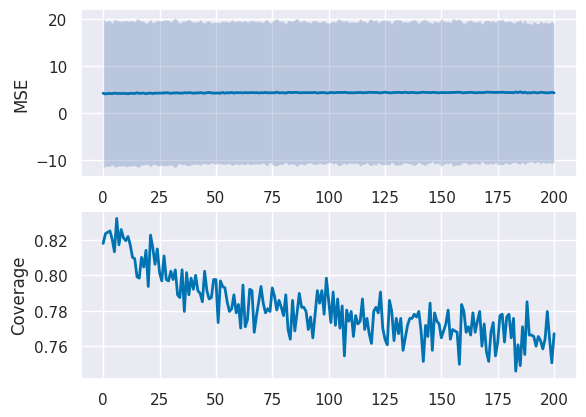

In [35]:
plot_mse_coverage(metrics, 0)

# Interactive 

In [36]:
from src.utils import get_model_from_run
from src.eval import eval_model

model, conf = get_model_from_run(run_path)

In [37]:
metrics = {}
metrics['ours'] = eval_model(model.to('cuda'), conf.scm, conf.curriculum.points.end)

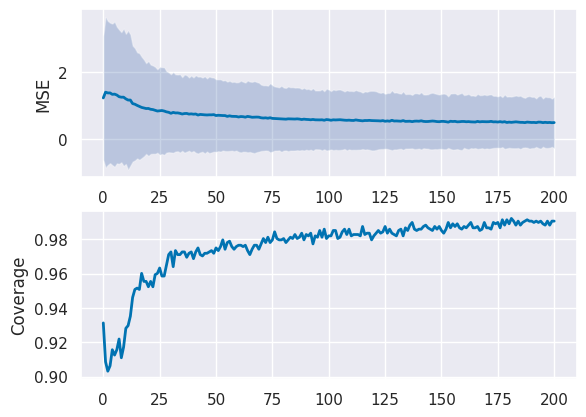

In [38]:
plot_mse_coverage(metrics, 0)